## 1. Import Libraries and Data

In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Create path
path = r'C:\Users\T\Desktop\career foundry\Phyton\Instacart Basket Analysis 30.10.24'

In [4]:
#Importing Latest Dataframe
instacart = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_cust_merge_4.9_cust.pkl'))

In [5]:
# Display all columns
pd.set_option('display.max_columns', None)

In [6]:
instacart.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,match,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,customer_frequency,frequency_flag,First Name,Last Name,Gender,State,Age,Date Joined,Number_of_Dependents,Family Status,Income
0,2,202279,3,5,9,8.0,False,33120.0,1.0,1.0,both,Organic Egg Whites,86,16,11.3,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119
1,2,202279,3,5,9,8.0,False,28985.0,2.0,1.0,both,Michigan Organic Kale,83,4,13.4,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119
2,2,202279,3,5,9,8.0,False,9327.0,3.0,0.0,both,Garlic Powder,104,13,3.6,both,Low-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119
3,2,202279,3,5,9,8.0,False,45918.0,4.0,1.0,both,Coconut Butter,19,13,8.4,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119
4,2,202279,3,5,9,8.0,False,30035.0,5.0,0.0,both,Natural Sweetener,17,13,13.7,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119


## 2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

#### Columns like first name, last name, age, gender,state,number of dependents, marital_status, income could lead to identification of a single person using external data sources.This issue can be solved by dropping name and surname columns.

In [9]:
# Dropping name, surname and _merge(unnecessary) columns
instacart = instacart.drop(columns=['First Name','Last Name','_merge'])

In [10]:
instacart.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,match,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,customer_frequency,frequency_flag,Gender,State,Age,Date Joined,Number_of_Dependents,Family Status,Income
0,2,202279,3,5,9,8.0,False,33120.0,1.0,1.0,Organic Egg Whites,86,16,11.3,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119
1,2,202279,3,5,9,8.0,False,28985.0,2.0,1.0,Michigan Organic Kale,83,4,13.4,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119
2,2,202279,3,5,9,8.0,False,9327.0,3.0,0.0,Garlic Powder,104,13,3.6,both,Low-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119
3,2,202279,3,5,9,8.0,False,45918.0,4.0,1.0,Coconut Butter,19,13,8.4,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119
4,2,202279,3,5,9,8.0,False,30035.0,5.0,0.0,Natural Sweetener,17,13,13.7,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119


## 3. Regional segmentation of the data

#### 3.1. Region columns Set-Up

In [13]:
result = []
for value in instacart['State']:
    if value in ('Maine'	'New Hampshire'	'Vermont'	'Massachusetts'	'Rhode Island'	'Connecticut'	'New York'	'Pennsylvania'	'New Jersey'
) :
        result.append('Northeast')
    elif value in ('Wisconsin'	'Michigan'	'Illinois'	'Indiana'	'Ohio'	'North Dakota'	'South Dakota'	'Nebraska'	'Kansas'	'Minnesota'	'Iowa'	'Missouri'
) :
        result.append('Midwest')
    elif value in ('Delaware'	'Maryland'	'District of Columbia'	'Virginia'	'West Virginia'	'North Carolina'	'South Carolina'	'Georgia'	'Florida'	'Kentucky'	'Tennessee'	'Mississippi'	'Alabama'	'Oklahoma'	'Texas'	'Arkansas'	'Louisiana'
) :
        result.append('South')
    elif value in ('Idaho'	'Montana'	'Wyoming'	'Nevada'	'Utah'	'Colorado'	'Arizona'	'New Mexico'	'Alaska'	'Washington'	'Oregon'	'California'	'Hawaii'
) :
        result.append('West')
    else :
        result.append('Not a region')

In [14]:
#Assigning the values in result[] to new column Region
instacart['region']=result

In [15]:
instacart['region'].value_counts()

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [16]:
instacart.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,match,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,customer_frequency,frequency_flag,Gender,State,Age,Date Joined,Number_of_Dependents,Family Status,Income,region
0,2,202279,3,5,9,8.0,False,33120.0,1.0,1.0,Organic Egg Whites,86,16,11.3,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West
1,2,202279,3,5,9,8.0,False,28985.0,2.0,1.0,Michigan Organic Kale,83,4,13.4,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West
2,2,202279,3,5,9,8.0,False,9327.0,3.0,0.0,Garlic Powder,104,13,3.6,both,Low-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West
3,2,202279,3,5,9,8.0,False,45918.0,4.0,1.0,Coconut Butter,19,13,8.4,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West
4,2,202279,3,5,9,8.0,False,30035.0,5.0,0.0,Natural Sweetener,17,13,13.7,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West


#### 3.2. Crosstab creating to compare spending habits in different regions

In [18]:
crosstab = pd.crosstab (instacart['region'], instacart['spender_flag'],dropna = False)

In [19]:
crosstab.to_clipboard()

In [20]:
# Print the crosstab
print(crosstab)

spender_flag  High_spender  Low_spender
region                                 
Midwest             155975      7441350
Northeast           108225      5614511
South               209691     10582194
West                160354      8132559


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Midwest'),
  Text(1, 0, 'Northeast'),
  Text(2, 0, 'South'),
  Text(3, 0, 'West')])

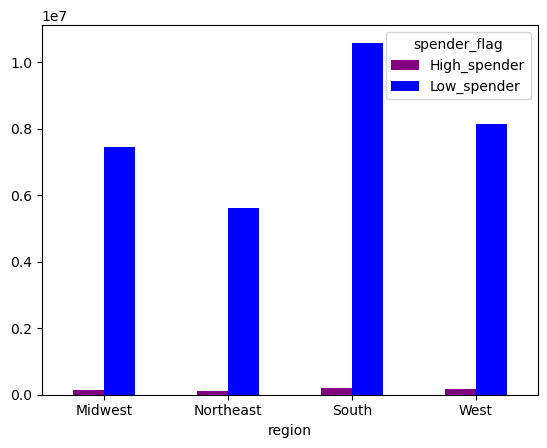

In [293]:
#Bar graph of the crosstab (for better understanding)
bar_reg_loy =  crosstab.plot.bar(color =['purple', 'blue'])
plt.xticks(rotation=0)

#### Southern Region has highest number of High Spenders and low spenders, then consequently follwed by West then Midwest and finally Northeast. This difference may be due to public transportation inefficiencies or the distance of living sites from the shopping areas. Therefore, people may want to use online shopping by instacart. On the other hand, all regions have more low spenders than the high spenders.

In [295]:
#Exporting bar graph
bar_reg_loy.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_reg_loy.png'))

## 4.The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [25]:
# Creating a new column to flag low-activity customers
#Exclude customers where max_order is less than 5
instacart.loc[instacart['max_order'] < 5, 'execution_flag'] = 'Exclude'

In [26]:
# Keep customers where max_order is greater than or equal to 5
instacart.loc[instacart['max_order'] >= 5, 'execution_flag'] = 'Keep'

In [27]:
instacart.head(10)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,match,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,customer_frequency,frequency_flag,Gender,State,Age,Date Joined,Number_of_Dependents,Family Status,Income,region,execution_flag
0,2,202279,3,5,9,8.0,False,33120.0,1.0,1.0,Organic Egg Whites,86,16,11.3,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,Keep
1,2,202279,3,5,9,8.0,False,28985.0,2.0,1.0,Michigan Organic Kale,83,4,13.4,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,Keep
2,2,202279,3,5,9,8.0,False,9327.0,3.0,0.0,Garlic Powder,104,13,3.6,both,Low-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,Keep
3,2,202279,3,5,9,8.0,False,45918.0,4.0,1.0,Coconut Butter,19,13,8.4,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,Keep
4,2,202279,3,5,9,8.0,False,30035.0,5.0,0.0,Natural Sweetener,17,13,13.7,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,Keep
5,2,202279,3,5,9,8.0,False,17794.0,6.0,1.0,Carrots,83,4,10.7,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,Keep
6,2,202279,3,5,9,8.0,False,40141.0,7.0,1.0,Original Unflavored Gelatine Mix,105,13,11.5,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,Keep
7,2,202279,3,5,9,8.0,False,1819.0,8.0,1.0,All Natural No Stir Creamy Almond Butter,88,13,11.5,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,Keep
8,2,202279,3,5,9,8.0,False,43668.0,9.0,0.0,Classic Blend Cole Slaw,123,4,7.5,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,Keep
9,3,205970,16,5,17,12.0,False,33754.0,1.0,1.0,Total 2% with Strawberry Lowfat Greek Strained...,120,16,11.8,both,Mid-range product,Regularly busy,Regularly busy,Average orders,25,Regular customer,8.681734,Low_spender,8.0,Frequent customer,Male,Oregon,43,7/13/2019,2,married,149831,West,Keep


In [28]:
instacart['execution_flag'].value_counts()

execution_flag
Keep       30964564
Exclude     1440295
Name: count, dtype: int64

In [29]:
execution_flag_crosstab = pd.crosstab(instacart['max_order'], instacart['execution_flag'],dropna = False)

In [30]:
execution_flag_crosstab.to_clipboard()

##### Confirmed in Excel that, an execution flag 'Exclude' is added when max_order is less than 5

In [32]:
#Creating subset (Excluding rows that have max order less than 5)
instacart = instacart[instacart['execution_flag'] == 'Keep']

In [33]:
instacart.shape

(30964564, 34)

#### Number of rows are equal to the number of keep 30964564

In [35]:
instacart.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,match,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,customer_frequency,frequency_flag,Gender,State,Age,Date Joined,Number_of_Dependents,Family Status,Income,region,execution_flag
0,2,202279,3,5,9,8.0,False,33120.0,1.0,1.0,Organic Egg Whites,86,16,11.3,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,Keep
1,2,202279,3,5,9,8.0,False,28985.0,2.0,1.0,Michigan Organic Kale,83,4,13.4,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,Keep
2,2,202279,3,5,9,8.0,False,9327.0,3.0,0.0,Garlic Powder,104,13,3.6,both,Low-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,Keep
3,2,202279,3,5,9,8.0,False,45918.0,4.0,1.0,Coconut Butter,19,13,8.4,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,Keep
4,2,202279,3,5,9,8.0,False,30035.0,5.0,0.0,Natural Sweetener,17,13,13.7,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,Keep


In [36]:
#Removing unnecessary columns
instacart= instacart.drop(columns = 'execution_flag')

In [37]:
instacart.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,match,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,customer_frequency,frequency_flag,Gender,State,Age,Date Joined,Number_of_Dependents,Family Status,Income,region
0,2,202279,3,5,9,8.0,False,33120.0,1.0,1.0,Organic Egg Whites,86,16,11.3,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West
1,2,202279,3,5,9,8.0,False,28985.0,2.0,1.0,Michigan Organic Kale,83,4,13.4,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West
2,2,202279,3,5,9,8.0,False,9327.0,3.0,0.0,Garlic Powder,104,13,3.6,both,Low-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West
3,2,202279,3,5,9,8.0,False,45918.0,4.0,1.0,Coconut Butter,19,13,8.4,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West
4,2,202279,3,5,9,8.0,False,30035.0,5.0,0.0,Natural Sweetener,17,13,13.7,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West


In [38]:
#Exporting Filtered Data
instacart.to_pickle(os.path.join(path,'02 Data','Prepared Data', 'instacart.pkl'))

## 5. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

### 5.1 Age Young adult =< 25, Adult 25-40, Older Adult 40-65, Senior 65+

In [41]:
#Creating age profiling variable
instacart.loc[instacart['Age'] <= 25 ,'age_group'] = 'Young Adult'
instacart.loc[(instacart['Age'] > 25) & (instacart['Age'] <= 45) ,'age_group'] = 'Middle-Aged Adult'
instacart.loc[(instacart['Age'] > 45) & (instacart['Age'] <= 65) ,'age_group'] = 'Older Adult'
instacart.loc[instacart['Age'] > 65 ,'age_group'] = 'Senior'

In [42]:
instacart.head(10)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,match,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,customer_frequency,frequency_flag,Gender,State,Age,Date Joined,Number_of_Dependents,Family Status,Income,region,age_group
0,2,202279,3,5,9,8.0,False,33120.0,1.0,1.0,Organic Egg Whites,86,16,11.3,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,Older Adult
1,2,202279,3,5,9,8.0,False,28985.0,2.0,1.0,Michigan Organic Kale,83,4,13.4,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,Older Adult
2,2,202279,3,5,9,8.0,False,9327.0,3.0,0.0,Garlic Powder,104,13,3.6,both,Low-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,Older Adult
3,2,202279,3,5,9,8.0,False,45918.0,4.0,1.0,Coconut Butter,19,13,8.4,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,Older Adult
4,2,202279,3,5,9,8.0,False,30035.0,5.0,0.0,Natural Sweetener,17,13,13.7,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,Older Adult
5,2,202279,3,5,9,8.0,False,17794.0,6.0,1.0,Carrots,83,4,10.7,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,Older Adult
6,2,202279,3,5,9,8.0,False,40141.0,7.0,1.0,Original Unflavored Gelatine Mix,105,13,11.5,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,Older Adult
7,2,202279,3,5,9,8.0,False,1819.0,8.0,1.0,All Natural No Stir Creamy Almond Butter,88,13,11.5,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,Older Adult
8,2,202279,3,5,9,8.0,False,43668.0,9.0,0.0,Classic Blend Cole Slaw,123,4,7.5,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,Older Adult
9,3,205970,16,5,17,12.0,False,33754.0,1.0,1.0,Total 2% with Strawberry Lowfat Greek Strained...,120,16,11.8,both,Mid-range product,Regularly busy,Regularly busy,Average orders,25,Regular customer,8.681734,Low_spender,8.0,Frequent customer,Male,Oregon,43,7/13/2019,2,married,149831,West,Middle-Aged Adult


In [43]:
instacart['age_group'].value_counts()

age_group
Middle-Aged Adult    9702539
Older Adult          9666673
Senior               7730834
Young Adult          3864518
Name: count, dtype: int64

In [44]:
#Aggregate for age group usage frequency
instacart.groupby('age_group').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                    mean  min   max
age_group                                          
Middle-Aged Adult              10.816670  0.0  30.0
Older Adult                    10.820200  0.0  30.0
Senior                         10.795536  0.0  30.0
Young Adult                    10.799071  0.0  30.0

In [45]:
# Check value counts for each age group
age_group_counts = instacart['age_group'].value_counts(dropna = False)
age_group_counts

age_group
Middle-Aged Adult    9702539
Older Adult          9666673
Senior               7730834
Young Adult          3864518
Name: count, dtype: int64

### 5.2. Income :  Low, Middle, & High Income groups 

In [47]:
#Creating income profiling variable
instacart.loc[instacart['Income'] <= 50000 ,'income_group'] = 'Low'
instacart.loc[(instacart['Income'] > 50000) & (instacart['Age'] <= 100000) ,'income_group'] = 'Middle'
instacart.loc[instacart['Income'] > 100000 ,'income_group'] = 'High'

In [48]:
instacart['income_group'].value_counts()

income_group
High      14207028
Middle    13394982
Low        3362554
Name: count, dtype: int64

In [49]:
instacart.head(10)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,match,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,customer_frequency,frequency_flag,Gender,State,Age,Date Joined,Number_of_Dependents,Family Status,Income,region,age_group,income_group
0,2,202279,3,5,9,8.0,False,33120.0,1.0,1.0,Organic Egg Whites,86,16,11.3,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,Older Adult,Middle
1,2,202279,3,5,9,8.0,False,28985.0,2.0,1.0,Michigan Organic Kale,83,4,13.4,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,Older Adult,Middle
2,2,202279,3,5,9,8.0,False,9327.0,3.0,0.0,Garlic Powder,104,13,3.6,both,Low-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,Older Adult,Middle
3,2,202279,3,5,9,8.0,False,45918.0,4.0,1.0,Coconut Butter,19,13,8.4,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,Older Adult,Middle
4,2,202279,3,5,9,8.0,False,30035.0,5.0,0.0,Natural Sweetener,17,13,13.7,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,Older Adult,Middle
5,2,202279,3,5,9,8.0,False,17794.0,6.0,1.0,Carrots,83,4,10.7,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,Older Adult,Middle
6,2,202279,3,5,9,8.0,False,40141.0,7.0,1.0,Original Unflavored Gelatine Mix,105,13,11.5,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,Older Adult,Middle
7,2,202279,3,5,9,8.0,False,1819.0,8.0,1.0,All Natural No Stir Creamy Almond Butter,88,13,11.5,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,Older Adult,Middle
8,2,202279,3,5,9,8.0,False,43668.0,9.0,0.0,Classic Blend Cole Slaw,123,4,7.5,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,Older Adult,Middle
9,3,205970,16,5,17,12.0,False,33754.0,1.0,1.0,Total 2% with Strawberry Lowfat Greek Strained...,120,16,11.8,both,Mid-range product,Regularly busy,Regularly busy,Average orders,25,Regular customer,8.681734,Low_spender,8.0,Frequent customer,Male,Oregon,43,7/13/2019,2,married,149831,West,Middle-Aged Adult,High


### 5.3 Number of dependents

In [51]:
instacart.loc[instacart['Number_of_Dependents'] > 0 ,'dependents_flag'] = 'Has Dependents'
instacart.loc[instacart['Number_of_Dependents'] == 0 ,'dependents_flag'] = 'No Dependents'

In [52]:
instacart['dependents_flag'].value_counts()

dependents_flag
Has Dependents    23224883
No Dependents      7739681
Name: count, dtype: int64

In [53]:
instacart.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,match,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,customer_frequency,frequency_flag,Gender,State,Age,Date Joined,Number_of_Dependents,Family Status,Income,region,age_group,income_group,dependents_flag
0,2,202279,3,5,9,8.0,False,33120.0,1.0,1.0,Organic Egg Whites,86,16,11.3,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,Older Adult,Middle,Has Dependents
1,2,202279,3,5,9,8.0,False,28985.0,2.0,1.0,Michigan Organic Kale,83,4,13.4,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,Older Adult,Middle,Has Dependents
2,2,202279,3,5,9,8.0,False,9327.0,3.0,0.0,Garlic Powder,104,13,3.6,both,Low-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,Older Adult,Middle,Has Dependents
3,2,202279,3,5,9,8.0,False,45918.0,4.0,1.0,Coconut Butter,19,13,8.4,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,Older Adult,Middle,Has Dependents
4,2,202279,3,5,9,8.0,False,30035.0,5.0,0.0,Natural Sweetener,17,13,13.7,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,Older Adult,Middle,Has Dependents


## 6. Create an appropriate visualization to show the distribution of profiles.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Middle-Aged Adult'),
  Text(1, 0, 'Older Adult'),
  Text(2, 0, 'Senior'),
  Text(3, 0, 'Young Adult')])

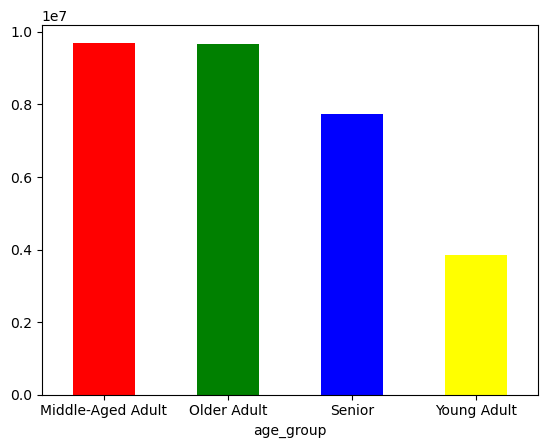

In [251]:
# 6.1.A Age Profile Visualization Bar Chart
bar_age_group = instacart['age_group'].value_counts().plot.bar(color = ['red','green','blue','yellow'])
plt.xticks(rotation=0)

In [56]:
# Export Bar Chart
bar_age_group.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','5.1.bar_age_group.png'))

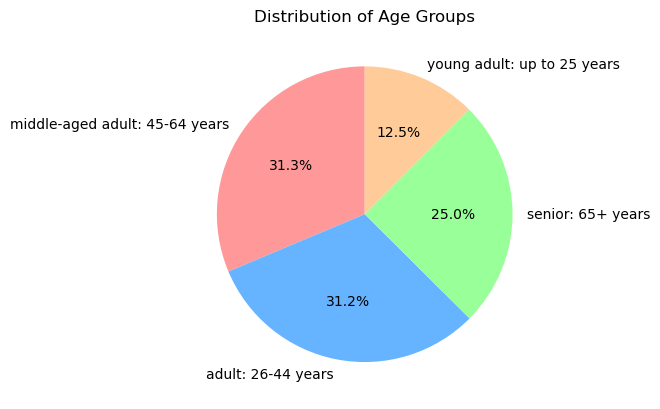

In [297]:
# 6.1.B Age Profile Visualization Pie Chart
# Make a pie chart showing the distribution of age groups
age_group_distribution_pie = age_group_counts.plot.pie(autopct='%1.1f%%', labels= ['middle-aged adult: 45-64 years', 'adult: 26-44 years', 'senior: 65+ years', 'young adult: up to 25 years'], startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.ylabel('')  # Hide the y-label
plt.title('Distribution of Age Groups')
plt.show()

In [299]:
# Export chart
age_group_distribution_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_group_distribution_pie.png'))

#### 6.2 Income Group

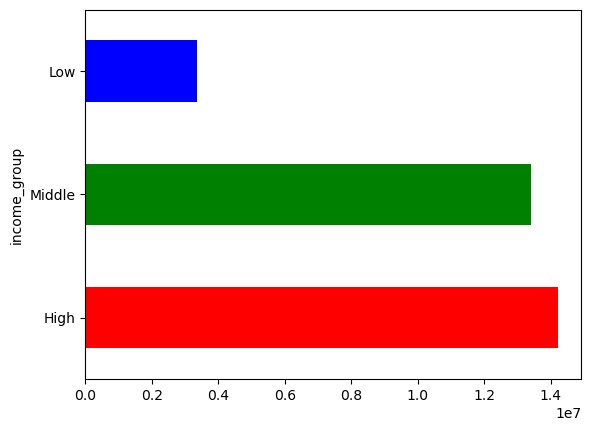

In [60]:
# 6.2.A Income Profile Visualization Horizontal Bar Chart
bar_income_group = instacart['income_group'].value_counts().plot.barh(color = ['red','green','blue'])

In [61]:
# Export Bar Chart
bar_income_group.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', '5.2.bar_income_group.png'))

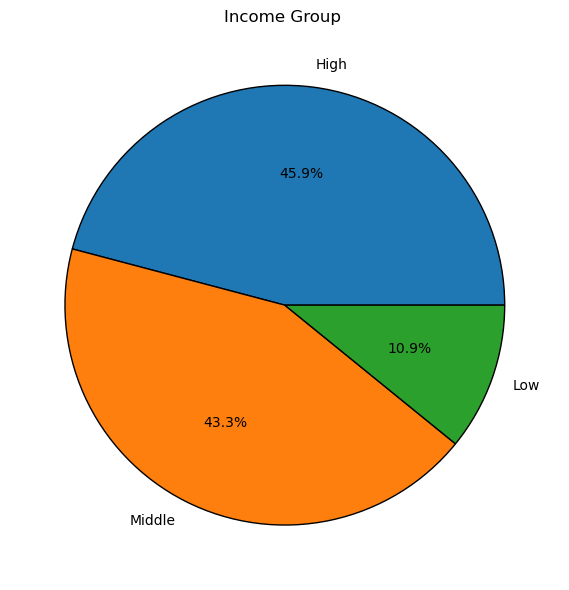

In [62]:
#6.2 B. Income Profile Visualization Pie Chart
pie_income_group_counts = instacart['income_group'].value_counts()
plt.figure(figsize=(6,6))
income_group_pie_chart=pie_income_group_counts.plot.pie(autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})
plt.title('Income Group ')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [63]:
# Export Pie Chart
income_group_pie_chart.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', '5.2.income_group_pie_chart.png'))

#### 6.3 Customers correlation w Dependents

(array([0, 1]), [Text(0, 0, 'Has Dependents'), Text(1, 0, 'No Dependents')])

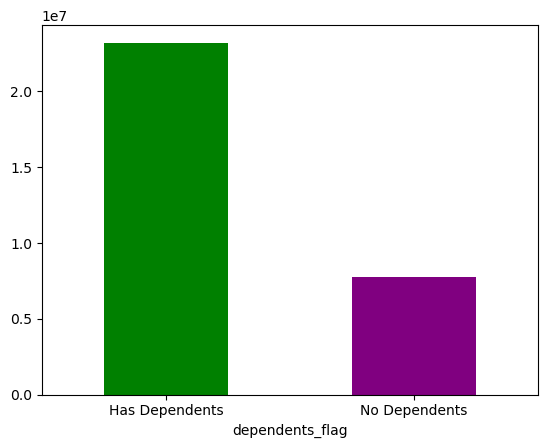

In [257]:
# 6.3.A Creating Dependents Visualization Bar Chart
dependents_flag_bar_chart=instacart['dependents_flag'].value_counts().plot.bar(color = ['green','purple'])
plt.xticks(rotation=0)

In [66]:
# Export Bar Chart
dependents_flag_bar_chart.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', '5.3.dependents_flag_bar_chart.png'))

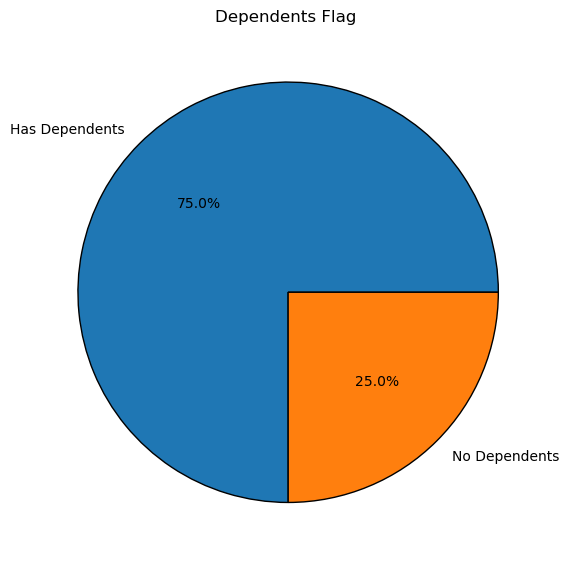

In [67]:
# 6.3.B Creating dependents visualization Pie Chart
dependents_flag_counts = instacart['dependents_flag'].value_counts()
plt.figure(figsize=(6,6))
dependents_flag_pie_chart=dependents_flag_counts.plot.pie(autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})
plt.title('Dependents Flag ')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [68]:
# Export Pie Chart
dependents_flag_pie_chart.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', '5.3.dependents_flag_pie_chart.png'))

## 7.Basic Statistics on Customer-Profile level for Usage Frequency and Expenditure

##### Usage frequency is analyzed based on days since prior order & expenditure based on prices columns. 

In [71]:
instacart.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'match', 'price_range_loc',
       'busiest_day', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'average_spend', 'spender_flag', 'customer_frequency',
       'frequency_flag', 'Gender', 'State', 'Age', 'Date Joined',
       'Number_of_Dependents', 'Family Status', 'Income', 'region',
       'age_group', 'income_group', 'dependents_flag'],
      dtype='object')

In [72]:
instacart.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,match,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,customer_frequency,frequency_flag,Gender,State,Age,Date Joined,Number_of_Dependents,Family Status,Income,region,age_group,income_group,dependents_flag
0,2,202279,3,5,9,8.0,False,33120.0,1.0,1.0,Organic Egg Whites,86,16,11.3,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,Older Adult,Middle,Has Dependents
1,2,202279,3,5,9,8.0,False,28985.0,2.0,1.0,Michigan Organic Kale,83,4,13.4,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,Older Adult,Middle,Has Dependents
2,2,202279,3,5,9,8.0,False,9327.0,3.0,0.0,Garlic Powder,104,13,3.6,both,Low-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,Older Adult,Middle,Has Dependents
3,2,202279,3,5,9,8.0,False,45918.0,4.0,1.0,Coconut Butter,19,13,8.4,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,Older Adult,Middle,Has Dependents
4,2,202279,3,5,9,8.0,False,30035.0,5.0,0.0,Natural Sweetener,17,13,13.7,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,Older Adult,Middle,Has Dependents


In [73]:
# An aggregated subset of data with 'prices' column as the total cost of each order:
# Creating aggregation subset of customer profile
customer_profile = instacart.groupby(['user_id','order_number','loyalty_flag','spender_flag','region','age_group','income_group','Family Status','dependents_flag','days_since_prior_order'])['prices'].sum().reset_index()

In [74]:
customer_profile

,user_id,order_number,loyalty_flag,spender_flag,region,age_group,income_group,Family Status,dependents_flag,days_since_prior_order,prices
0,1,2,New customer,Low_spender,South,Middle-Aged Adult,Low,married,Has Dependents,15.0,35.4
1,1,3,New customer,Low_spender,South,Middle-Aged Adult,Low,married,Has Dependents,21.0,28.2
2,1,4,New customer,Low_spender,South,Middle-Aged Adult,Low,married,Has Dependents,29.0,26.0
3,1,5,New customer,Low_spender,South,Middle-Aged Adult,Low,married,Has Dependents,28.0,57.0
4,1,6,New customer,Low_spender,South,Middle-Aged Adult,Low,married,Has Dependents,19.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...
2901748,206209,9,Regular customer,Low_spender,Midwest,Senior,High,married,Has Dependents,22.0,26.2
2901749,206209,10,Regular customer,Low_spender,Midwest,Senior,High,married,Has Dependents,29.0,64.7
2901750,206209,11,Regular customer,Low_spender,Midwest,Senior,High,married,Has Dependents,30.0,56.1
2901751,206209,12,Regular customer,Low_spender,Midwest,Senior,High,married,Has Dependents,18.0,131.5


In [75]:
# Rename 'prices' to 'order_total'
customer_profile.rename(columns = {'prices' : 'order_total'}, inplace = True)

In [76]:
# Rename 'Family Status' to 'Marital Status'
customer_profile.rename(columns = {'Family Status' : 'Marital Status'}, inplace = True)

In [77]:
customer_profile['order_total'].dtype

dtype('float64')

In [78]:
customer_profile['order_total'] = customer_profile['order_total'].astype('float64')

In [79]:
customer_profile

,user_id,order_number,loyalty_flag,spender_flag,region,age_group,income_group,Marital Status,dependents_flag,days_since_prior_order,order_total
0,1,2,New customer,Low_spender,South,Middle-Aged Adult,Low,married,Has Dependents,15.0,35.4
1,1,3,New customer,Low_spender,South,Middle-Aged Adult,Low,married,Has Dependents,21.0,28.2
2,1,4,New customer,Low_spender,South,Middle-Aged Adult,Low,married,Has Dependents,29.0,26.0
3,1,5,New customer,Low_spender,South,Middle-Aged Adult,Low,married,Has Dependents,28.0,57.0
4,1,6,New customer,Low_spender,South,Middle-Aged Adult,Low,married,Has Dependents,19.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...
2901748,206209,9,Regular customer,Low_spender,Midwest,Senior,High,married,Has Dependents,22.0,26.2
2901749,206209,10,Regular customer,Low_spender,Midwest,Senior,High,married,Has Dependents,29.0,64.7
2901750,206209,11,Regular customer,Low_spender,Midwest,Senior,High,married,Has Dependents,30.0,56.1
2901751,206209,12,Regular customer,Low_spender,Midwest,Senior,High,married,Has Dependents,18.0,131.5


### 7.1 Age Group

In [81]:
age_agg = customer_profile.groupby('age_group').agg({'days_since_prior_order':['mean','min','max'],'order_total':['mean','min','max']})       

In [82]:
age_agg

days_since_prior_order            order_total             
                                    mean  min   max        mean  min     max
age_group                                                                   
Middle-Aged Adult              10.400522  0.0  30.0   78.902503  0.0   829.2
Older Adult                    10.387180  0.0  30.0   78.632479  0.0  1092.2
Senior                         10.367963  0.0  30.0   78.314128  0.0   751.1
Young Adult                    10.380577  0.0  30.0   78.871569  0.0   842.1

### 7.2 Income Group

In [84]:
income_agg = customer_profile.groupby('income_group').agg({'days_since_prior_order':['mean','min','max'],'order_total':['mean','min','max']}) 

In [85]:
income_agg

days_since_prior_order            order_total             
                               mean  min   max        mean  min     max
income_group                                                           
High                      10.260991  0.0  30.0   83.756020  0.0  1092.2
Low                       11.070341  0.0  30.0   52.673028  1.0   875.0
Middle                    10.290003  0.0  30.0   81.930008  0.0   852.5

### 7.3 Dependents Category

In [87]:
dependents_agg = customer_profile.groupby('dependents_flag').agg({'days_since_prior_order':['mean','min','max'],'order_total':['mean','min','max']})       

In [88]:
dependents_agg

days_since_prior_order            order_total             
                                  mean  min   max        mean  min     max
dependents_flag                                                           
Has Dependents               10.388225  0.0  30.0   78.728425  0.0  1092.2
No Dependents                10.378169  0.0  30.0   78.482107  0.0   875.0

## 8.Comparison of Customer Profiles with Regions and Departments

In [90]:
# Importing department dataframe
dept = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','departments_wrangled.csv'))

In [91]:
dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [92]:
# Renaming index column as department_id
dept.rename(columns ={'Unnamed: 0' : 'department_id'}, inplace = True)

In [93]:
#Merging instacart dataset with department dataset
instacart_dept = instacart.merge(dept, on = 'department_id', how = 'left', indicator = True)

In [94]:
instacart_dept.shape 

(30964564, 38)

In [95]:
# Exporting New Merged Dataframe
instacart_dept.to_pickle(os.path.join(path,'02 Data','Prepared Data','instacart_dept.pkl'))

In [96]:
#Importing Merged Data
instacart_dept = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','instacart_dept.pkl'))

In [97]:
instacart_dept.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,match,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,customer_frequency,frequency_flag,Gender,State,Age,Date Joined,Number_of_Dependents,Family Status,Income,region,age_group,income_group,dependents_flag,department,_merge
0,2,202279,3,5,9,8.0,False,33120.0,1.0,1.0,Organic Egg Whites,86,16,11.3,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,Older Adult,Middle,Has Dependents,dairy eggs,both
1,2,202279,3,5,9,8.0,False,28985.0,2.0,1.0,Michigan Organic Kale,83,4,13.4,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,Older Adult,Middle,Has Dependents,produce,both
2,2,202279,3,5,9,8.0,False,9327.0,3.0,0.0,Garlic Powder,104,13,3.6,both,Low-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,Older Adult,Middle,Has Dependents,pantry,both
3,2,202279,3,5,9,8.0,False,45918.0,4.0,1.0,Coconut Butter,19,13,8.4,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,Older Adult,Middle,Has Dependents,pantry,both
4,2,202279,3,5,9,8.0,False,30035.0,5.0,0.0,Natural Sweetener,17,13,13.7,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,Older Adult,Middle,Has Dependents,pantry,both


In [98]:
instacart_dept['department'].value_counts()

department
produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: count, dtype: int64

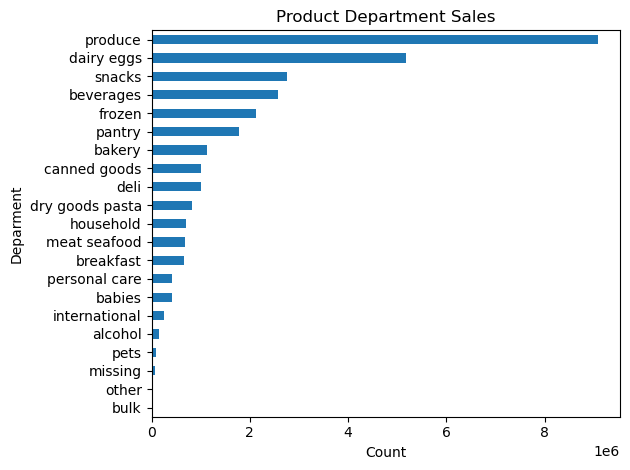

In [99]:
#Creating bar chart of Departments
dept_bar = instacart_dept['department'].value_counts().sort_values(ascending= True).plot.barh()
plt.title('Product Department Sales')
plt.xlabel('Count')
plt.ylabel('Deparment')
plt.tight_layout()

In [100]:
#Exporting Bar Chart
dept_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','8.departments_product_bar.png'))

In [101]:
# Selecting relevant columns
user_sample = instacart_dept[['user_id','age_group','income_group','dependents_flag','region','loyalty_flag']]

In [102]:
user_sample = user_sample.drop_duplicates()

In [103]:
user_sample.shape

(162631, 6)

In [104]:
user_sample

,user_id,age_group,income_group,dependents_flag,region,loyalty_flag
0,202279,Older Adult,Middle,Has Dependents,West,New customer
9,205970,Middle-Aged Adult,High,Has Dependents,West,Regular customer
17,178520,Senior,Middle,Has Dependents,Northeast,Loyal customer
30,156122,Middle-Aged Adult,Middle,Has Dependents,South,Loyal customer
56,22352,Middle-Aged Adult,Middle,Has Dependents,Midwest,New customer
...,...,...,...,...,...,...
25615352,8912,Middle-Aged Adult,Low,Has Dependents,Midwest,New customer
25698486,96672,Senior,Middle,Has Dependents,Northeast,New customer
26171668,147094,Senior,Low,Has Dependents,South,New customer
26905459,53101,Older Adult,Low,No Dependents,South,New customer


### 8.1 Customer Profile by Regions


#### 8.1.1 Comparing age_group vs region

In [107]:
age_region_comparison = pd.crosstab(instacart_dept['age_group'],instacart_dept['region'],dropna = False)

In [108]:
age_region_comparison

region,Midwest,Northeast,South,West
age_group,,,,
Middle-Aged Adult,2286075,1693019,3261271,2462174
Older Adult,2277677,1697267,3185845,2505884
Senior,1799606,1394490,2549034,1987704
Young Adult,898155,679909,1314989,971465


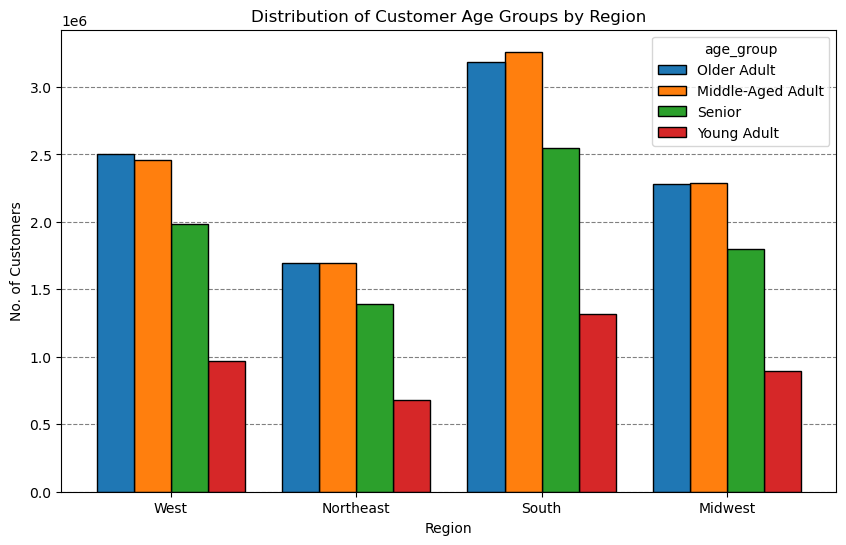

In [109]:
# Plotting Histogram for age group and region comparison
plt.figure(figsize=(10, 6))
sns.histplot(data=instacart_dept, x='region', hue='age_group', multiple='dodge', shrink=.8, alpha=1)
# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
# General formatting
plt.title('Distribution of Customer Age Groups by Region')
plt.ylabel('No. of Customers')
plt.xlabel('Region')
# Save and show
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','instacart_age_by_region.png'), bbox_inches = 'tight')
plt.show()

#### 8.1.2 Comparing income_group vs regions

In [111]:
income_region_comparison = pd.crosstab(instacart_dept['income_group'],instacart_dept['region'],dropna = False)

In [112]:
income_region_comparison

region,Midwest,Northeast,South,West
income_group,,,,
High,3400093,2516484,4663571,3626880
Low,783764,587137,1142572,849081
Middle,3077656,2361064,4504996,3451266


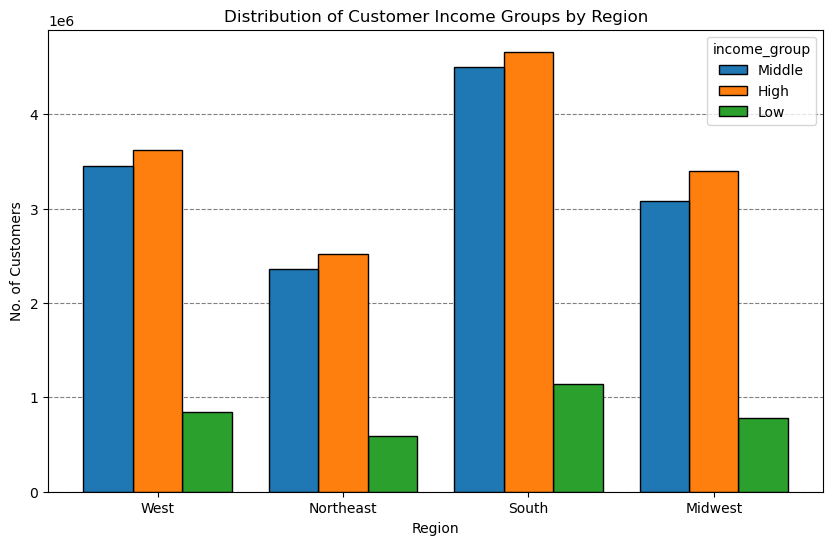

In [113]:
# Plotting Histogram for income group and region comparison
plt.figure(figsize=(10, 6))
sns.histplot(data=instacart_dept, x='region', hue='income_group', multiple='dodge', shrink=.8, alpha=1)
# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
# General formatting
plt.title('Distribution of Customer Income Groups by Region')
plt.ylabel('No. of Customers')
plt.xlabel('Region')
# Save and show
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','instacart_income_by_region.png'), bbox_inches = 'tight')
plt.show()

#### 8.1.3 Comparing Departments vs Region

In [115]:
dept_region_comparison = pd.crosstab(instacart_dept['department'],instacart_dept['region'],dropna = False)

In [116]:
dept_region_comparison

region,Midwest,Northeast,South,West
department,,,,
alcohol,34043,25017,48813,36754
babies,95741,72712,139511,102428
bakery,261753,199300,371620,288155
beverages,598979,462929,859419,650574
breakfast,156155,117904,223172,173619
bulk,7929,5599,11180,8743
canned goods,237459,176936,337458,260221
dairy eggs,1212490,914616,1723016,1327060
deli,234464,178398,333620,257352


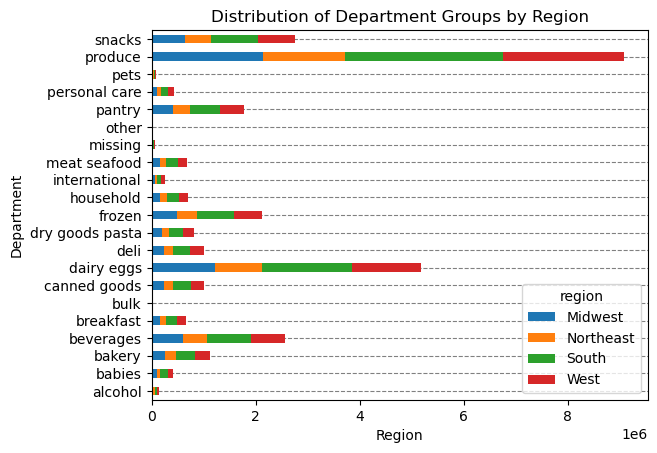

In [117]:
# Region_department Bar Chart

bar5 = dept_region_comparison.plot.barh(stacked =True)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')

# General formatting
plt.title('Distribution of Department Groups by Region')
plt.ylabel('Department')
plt.xlabel('Region')

# Exporting bar chart

bar5.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'bar_region_department.png'))

#### 8.1.4 Comparing Dependents vs Region

In [119]:
depend_region_comp  = pd.crosstab(instacart_dept['dependents_flag'],instacart_dept['region'],dropna = False)

In [120]:
depend_region_comp

region,Midwest,Northeast,South,West
dependents_flag,,,,
Has Dependents,5438697,4110203,7729206,5946777
No Dependents,1822816,1354482,2581933,1980450


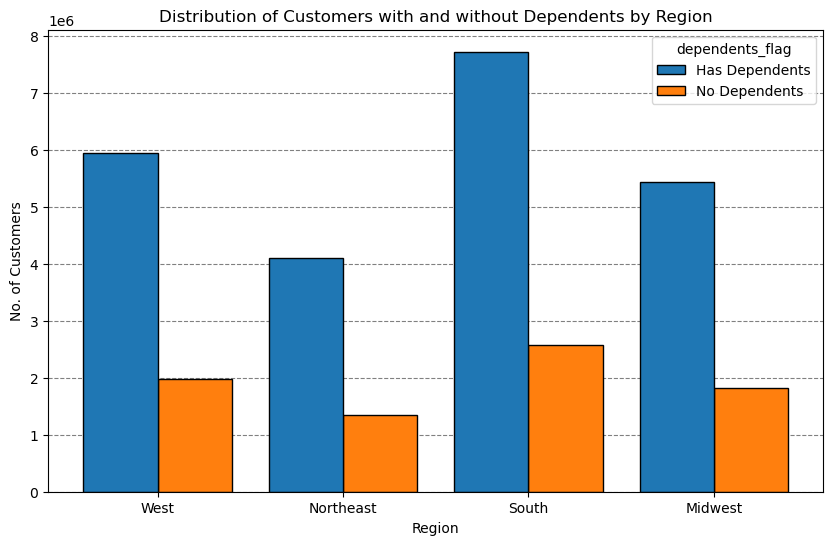

In [121]:
plt.figure(figsize=(10, 6))
# Plot the histogram bars
sns.histplot(data=instacart_dept, x='region', hue='dependents_flag', multiple='dodge', shrink=.8, alpha=1)
# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
# General formatting
plt.title('Distribution of Customers with and without Dependents by Region')
plt.ylabel('No. of Customers')
plt.xlabel('Region')
# Save and show
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','instacart_dependents_by_region.png'), bbox_inches = 'tight')
plt.show()

In [122]:
# Rename 'Family Status' to 'Marital Status'
customer_profile.rename(columns = {'Family Status' : 'Marital Status'}, inplace = True)

In [123]:
customer_profile

,user_id,order_number,loyalty_flag,spender_flag,region,age_group,income_group,Marital Status,dependents_flag,days_since_prior_order,order_total
0,1,2,New customer,Low_spender,South,Middle-Aged Adult,Low,married,Has Dependents,15.0,35.4
1,1,3,New customer,Low_spender,South,Middle-Aged Adult,Low,married,Has Dependents,21.0,28.2
2,1,4,New customer,Low_spender,South,Middle-Aged Adult,Low,married,Has Dependents,29.0,26.0
3,1,5,New customer,Low_spender,South,Middle-Aged Adult,Low,married,Has Dependents,28.0,57.0
4,1,6,New customer,Low_spender,South,Middle-Aged Adult,Low,married,Has Dependents,19.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...
2901748,206209,9,Regular customer,Low_spender,Midwest,Senior,High,married,Has Dependents,22.0,26.2
2901749,206209,10,Regular customer,Low_spender,Midwest,Senior,High,married,Has Dependents,29.0,64.7
2901750,206209,11,Regular customer,Low_spender,Midwest,Senior,High,married,Has Dependents,30.0,56.1
2901751,206209,12,Regular customer,Low_spender,Midwest,Senior,High,married,Has Dependents,18.0,131.5


In [124]:
fam_region_comp  = pd.crosstab(instacart_dept['Family Status'],instacart_dept['region'],dropna = False)
fam_region_comp

region,Midwest,Northeast,South,West
Family Status,,,,
divorced/widowed,617198,478767,877314,671992
living with parents and siblings,351435,256430,505457,367850
married,5087262,3853773,7223749,5578927
single,1205618,875715,1704619,1308458


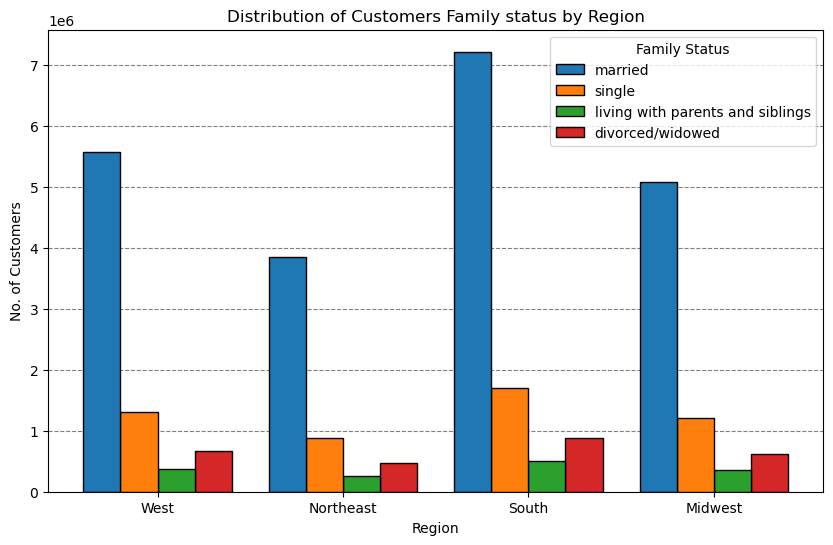

In [125]:
plt.figure(figsize=(10, 6))
# Plot the histogram bars
sns.histplot(data=instacart_dept, x='region', hue='Family Status', multiple='dodge', shrink=.8, alpha=1)
# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
# General formatting
plt.title('Distribution of Customers Family status by Region')
plt.ylabel('No. of Customers')
plt.xlabel('Region')
# Save and show
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','instacart_fam_by_region.png'), bbox_inches = 'tight')
plt.show()

### 8.2 Customer Profile vs Department Sales

#### 8.2.1 Comparing age group and department

In [128]:
age_dept_comp  = pd.crosstab(instacart_dept['department'],instacart_dept['age_group'],dropna = False)

In [129]:
age_dept_comp

age_group,Middle-Aged Adult,Older Adult,Senior,Young Adult
department,,,,
alcohol,45481,45267,34691,19188
babies,130299,128697,100162,51234
bakery,352102,350395,278458,139873
beverages,797642,809502,646414,318343
breakfast,209410,210472,165491,85477
bulk,10421,10388,8336,4306
canned goods,317972,315850,251940,126312
dairy eggs,1630318,1608332,1291039,647493
deli,315618,313198,250463,124555


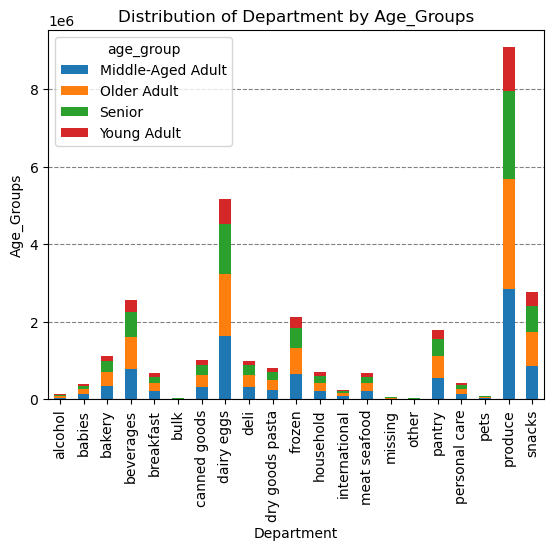

In [305]:
# Age Group_department Bar Chart

bar5 = age_dept_comp.plot.bar(stacked =True)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')

# General formatting
plt.title('Distribution of Department by Age_Groups')
plt.xlabel('Department')
plt.ylabel('Age_Groups')



# Exporting bar chart

bar5.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'bar_age_gp_department.png'))

#### 8.2.2 Comparing Income group and Department

In [132]:
income_dept_comp  = pd.crosstab(instacart_dept['department'],instacart_dept['income_group'],dropna = False)

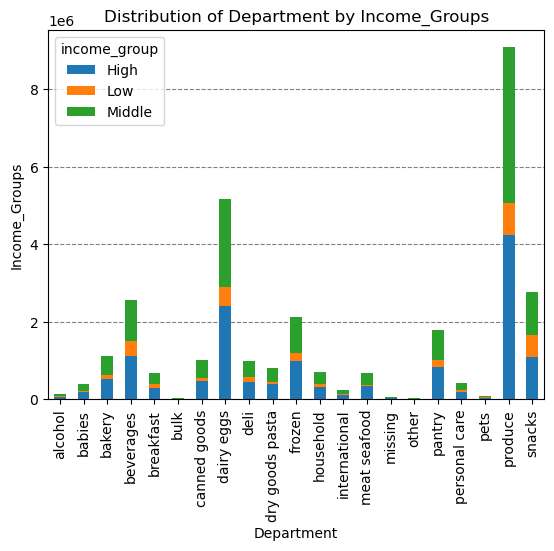

In [133]:
# Income Group_department Bar Chart

bar6 = income_dept_comp.plot.bar(stacked =True)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')

# General formatting
plt.title('Distribution of Department by Income_Groups')
plt.xlabel('Department')
plt.ylabel('Income_Groups')

# Exporting bar chart

bar6.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'bar_income_gp_department.png'))

In [134]:
# Group by income_group and department, count occurrences, and sort
income_department_counts = instacart_dept.groupby(['income_group', 'department']).size().reset_index(name='counts')

In [135]:
income_department_counts.sort_values(by=['income_group', 'counts'], ascending=False, inplace=True)

In [136]:
income_department_counts.head(50)

,income_group,department,counts
61,Middle,produce,4016038
49,Middle,dairy eggs,2268659
62,Middle,snacks,1102298
45,Middle,beverages,1062343
52,Middle,frozen,918102
58,Middle,pantry,776724
44,Middle,bakery,486368
48,Middle,canned goods,447873
50,Middle,deli,435297
51,Middle,dry goods pasta,364946


#### Most demanding 5 departments for all income groups, are Produce, dairy eggs, snacks, beverages and frozen.

#### 8.2.3 Comparing Dependents Flag and Department

In [139]:
depend_dept_comp  = pd.crosstab(instacart_dept['department'],instacart_dept['dependents_flag'],dropna = False)

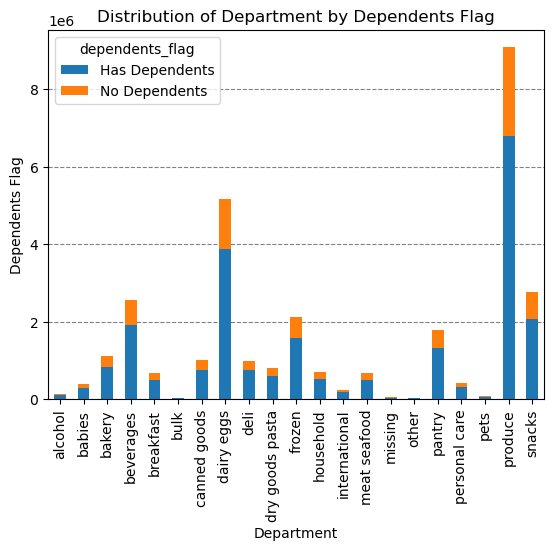

In [140]:
# Dependents Flag department Bar Chart

bar7 = depend_dept_comp.plot.bar(stacked =True)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')

# General formatting
plt.title('Distribution of Department by Dependents Flag')
plt.xlabel('Department')
plt.ylabel('Dependents Flag')

# Exporting bar chart

bar7.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','bar_depnd_department.png'))

### 8.3 Profiles by Frequency

#### 8.3.1 Income Groups

In [143]:
income_freq = pd.crosstab(instacart_dept['income_group'],instacart_dept['frequency_flag'],dropna = False)

In [144]:
income_freq

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
income_group,,,
High,9779323,1290502,3137203
Low,2199082,376138,787334
Middle,9226071,1228335,2940576


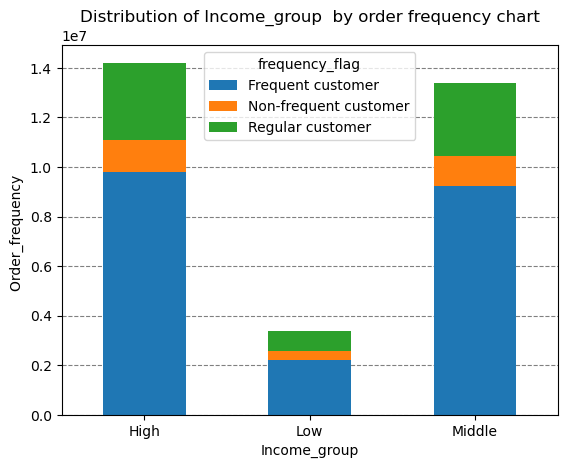

In [259]:
# Income Group and Order frequency Bar Chart

bar7 = income_freq.plot(kind='bar', stacked =True)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')

# General formatting
plt.title('Distribution of Income_group  by order frequency chart')
plt.ylabel('Order_frequency ')
plt.xlabel('Income_group')
plt.xticks(rotation=0)

# Exporting bar chart

bar7.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'bar_income_frequency.png'))

#### 8.3.2 Age Group , Frequency Comparison

In [147]:
# Creating crosstab for age and frequency
age_freq = pd.crosstab(instacart_dept['age_group'], instacart_dept['frequency_flag'], dropna = False)
age_freq

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
age_group,,,
Middle-Aged Adult,6642552,899332,2160655
Older Adult,6597287,919651,2149735
Senior,5310708,717553,1702573
Young Adult,2653929,358439,852150


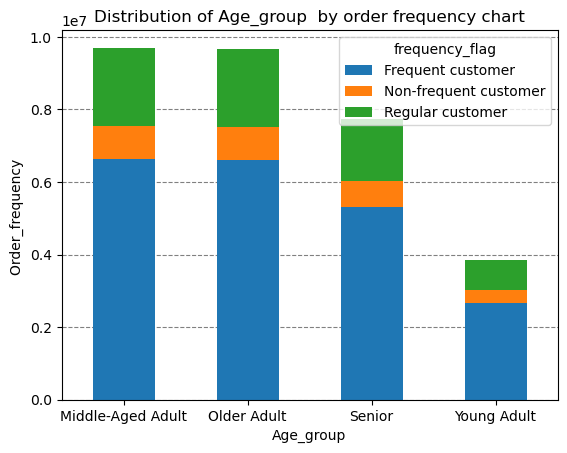

In [261]:
# Age Group and Order frequency Bar Chart

bar8 = age_freq.plot(kind='bar', stacked =True)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')

# General formatting
plt.title('Distribution of Age_group  by order frequency chart')
plt.ylabel('Order_frequency ')
plt.xlabel('Age_group')
plt.xticks(rotation=0)
# Exporting bar chart

bar8.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'bar_age_freq.png'))

#### 8.3.3 Marital status Frequency Comparison

In [150]:
# Creating crosstab for marital status and frequency

marital_freq = pd.crosstab(instacart_dept['Family Status'], instacart_dept['frequency_flag'], dropna = False)
marital_freq

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
Family Status,,,
divorced/widowed,1819123,243934,582214
living with parents and siblings,1030514,138646,312012
married,14888825,2039823,4815063
single,3466014,472572,1155824


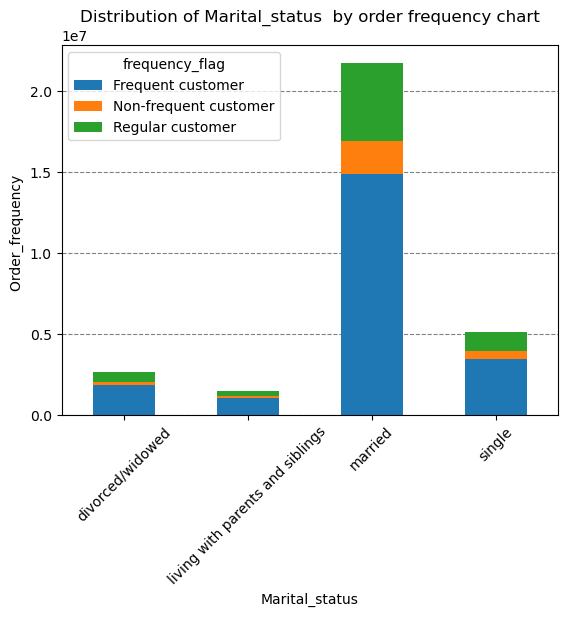

In [205]:
#Marital_freq Bar Chart

bar9 = marital_freq.plot(kind='bar', stacked =True)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')

# General formatting
plt.title('Distribution of Marital_status  by order frequency chart')
plt.ylabel('Order_frequency ')
plt.xlabel('Marital_status')
plt.xticks(rotation=45)

# Exporting bar chart

bar9.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_marital_freq.png'))

#### 8.3.4 Departments and Frequency Comparison

In [153]:
# Creating crosstab for department and frequency
dep_freq = pd.crosstab(instacart_dept['department'], instacart_dept['frequency_flag'], dropna = False)
dep_freq

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
department,,,
alcohol,100491,13271,30865
babies,316214,25297,68881
bakery,770435,103019,247374
beverages,1756158,244136,571607
breakfast,455837,64106,150907
bulk,25087,2514,5850
canned goods,658729,108011,245334
dairy eggs,3623889,452920,1100373
deli,674588,98098,231148


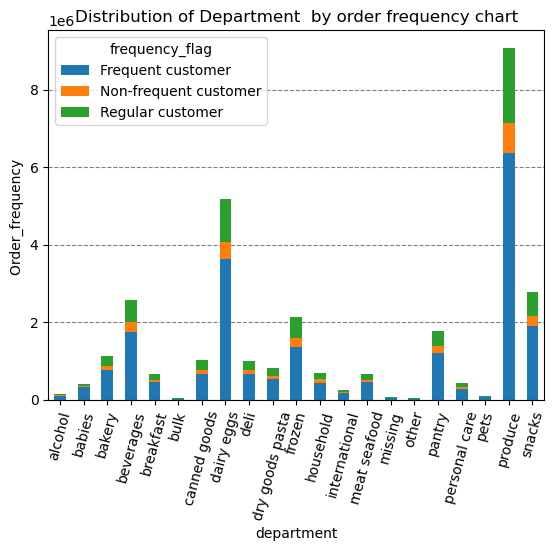

In [203]:
#dept_freq Bar Chart

bar9 = dep_freq.plot(kind='bar', stacked =True)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')

# General formatting
plt.title('Distribution of Department  by order frequency chart')
plt.ylabel('Order_frequency ')
plt.xlabel('department')
plt.xticks(rotation=75)

# Exporting bar chart
bar9.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'bar_dept_frequency.png'))

## 9. Visualizations

#### I expoerted the visualisations through the assignment.

## 10. Export final Data Set

In [158]:
instacart_dept.to_pickle(os.path.join(path,'02 Data','Prepared Data', 'instacart_final.pkl'))

## 11. Extra Visualizations

### 11.1 Busiest day of the week

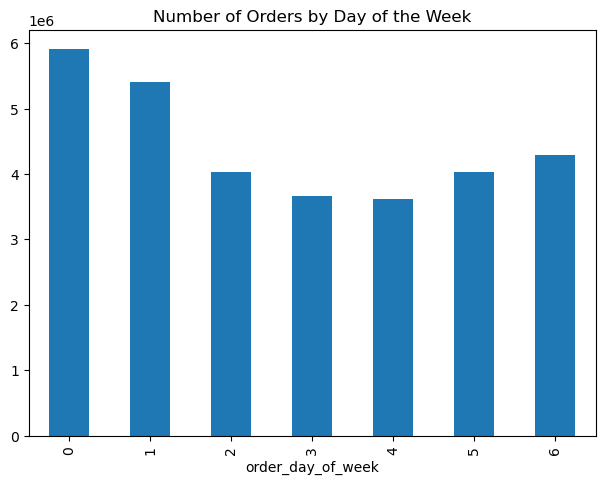

In [161]:
# Create a bar chart showing busiest days of the week

plt.title('Number of Orders by Day of the Week')
plt.xticks(rotation=0)  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to fit labels
plt.xlabel('Day of Week')


bar_order_day = instacart['order_day_of_week'].value_counts().sort_index().plot.bar()

bar_busiest_days_of_week = plt.gcf()
plt.savefig(os.path.join(path,'04 Analysis','Visualizations', 'bar_busiest_days_of_week.png'), bbox_inches = 'tight')


### 11.2 Busiest hours of the day

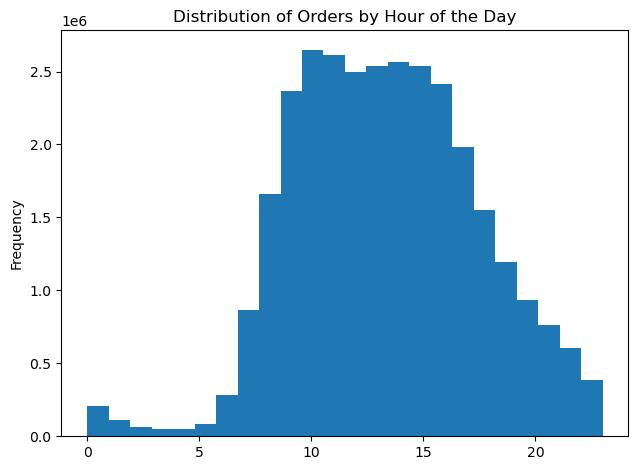

In [163]:
# Create a histogram showing the distribution of sales by order hour of the day

# Set formatting
plt.title('Distribution of Orders by Hour of the Day')
plt.tight_layout()  # Adjust layout to fit labels
plt.xlabel('Hour of Day')

# Plot chart
hist_busiest_hour_of_day = instacart['order_hour_of_day'].plot.hist(bins = 24)

hist_busiest_hour_of_day = plt.gcf()

# Display the plot
plt.show()
hist_busiest_hour_of_day.savefig(os.path.join(path,'04 Analysis','Visualizations', 'hist_busiest_hour_of_day.png'), dpi=300, bbox_inches='tight')

### 11.3 Top 10 Departments

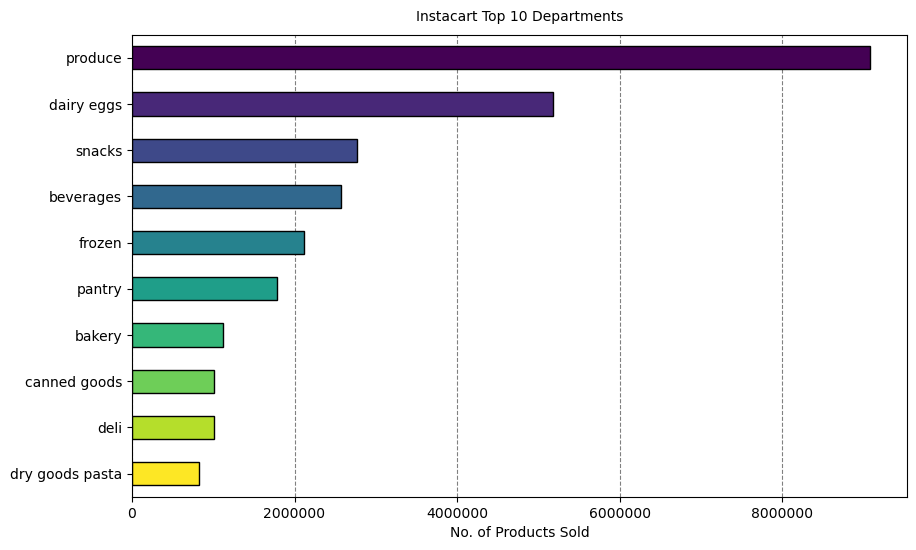

In [165]:
colors = plt.cm.viridis(np.linspace(0, 1, 10)) # Sets colour palette

fig, ax = plt.subplots(figsize = (10, 6))
plt.ticklabel_format(style='plain')

instacart_dept['department'].value_counts().sort_values(ascending = False).head(10).plot.barh(color = colors, 
                                                                                        zorder = 2, 
                                                                                        edgecolor = 'black')
plt.title('Instacart Top 10 Departments', size=10, pad=10)
plt.xlabel('No. of Products Sold', )
plt.ylabel('')
plt.grid(axis = 'x', color = 'gray', linestyle = 'dashed')
ax.invert_yaxis()
plt.savefig(os.path.join(path,'04 Analysis','Visualizations', 'Instacart_department_sales.png'), bbox_inches = 'tight')


### 11.4 Distribution of users according to brand loyalty

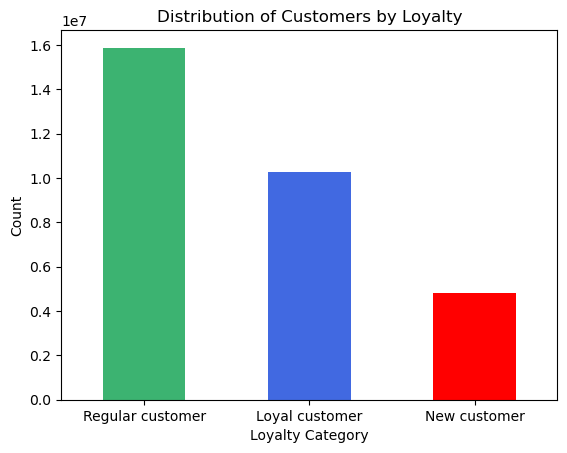

In [211]:
# Create bar chart on 'loyalty_flag' frequency

# Plot chart
bar_loyalty = instacart['loyalty_flag'].value_counts().plot.bar(color = ['mediumseagreen', 'royalblue', 'red'])

# Set formatting
plt.title('Distribution of Customers by Loyalty')
plt.ylabel('Count')
plt.xlabel('Loyalty Category')
plt.xticks(rotation=0)
bar_loyalty = plt.gcf()
plt.savefig(os.path.join(path, '04 Analysis','Visualizations',  'bar_loyalty.png'), bbox_inches = 'tight')

### 11.5 Ordering Habits based on Customer's Loyalty status

#### 11.5.1 Average Order Total by Customer Loyalty

In [170]:
# Compute average order_total
loyalty_order_total = customer_profile.groupby('loyalty_flag')['order_total'].mean().sort_values(ascending = False).reset_index()
loyalty_order_total

,loyalty_flag,order_total
0,Regular customer,79.666268
1,Loyal customer,77.887735
2,New customer,77.014072


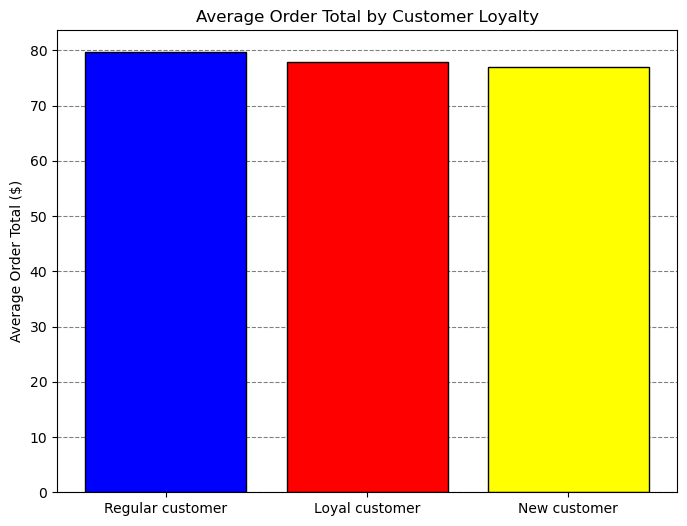

In [171]:
# Set up formatting and colours
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'yellow']

# Plot bars
bars = plt.bar(loyalty_order_total['loyalty_flag'], loyalty_order_total['order_total'], color=colors, edgecolor='black', zorder=2)
plt.title("Average Order Total by Customer Loyalty")
plt.xlabel("")
plt.xticks(rotation=0)
plt.ylabel("Average Order Total ($)")
plt.grid(axis = 'y', color = 'grey', linestyle = 'dashed')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations',  'instacart_average_order_by_loyalty.png'), bbox_inches = 'tight')

#### 11.5.2 Order Volume by Product Price Range and Customer Loyalty

In [173]:
# Grouping by Price Range
# Create a dataframe that contains the counts for each price_range for each loyaty group
loyalty_price_range = instacart.groupby(['loyalty_flag', 'price_range_loc']).size().unstack(fill_value=0)
loyalty_price_range

price_range_loc,High-range product,Low-range product,Mid-range product
loyalty_flag,,,
Loyal customer,119936,3214690,6949467
New customer,65927,1501288,3236480
Regular customer,212090,4958862,10705824


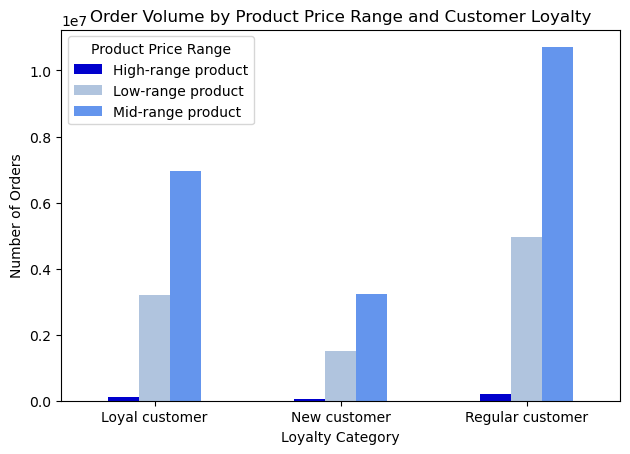

In [213]:
# Custom colors
colors = ['mediumblue', 'lightsteelblue', 'cornflowerblue']

# Plot the grouped bar chart
loyalty_price_range.plot(kind='bar', stacked=False, color=colors)
plt.title('Order Volume by Product Price Range and Customer Loyalty')
plt.xlabel('Loyalty Category')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.legend(title='Product Price Range')
plt.tight_layout()
product_price_range_by_loyalty = plt.gcf()
product_price_range_by_loyalty.savefig(os.path.join(path, '04 Analysis','Visualizations',  'product_price_range_by_loyalty.png'), dpi=300, bbox_inches='tight')

### 11.6 Ordering Habits based on Customer's Region

#### 11.6.1 Average Order Total by Region

In [177]:
# Average order_total per region
region_avg_order_total = customer_profile.groupby('region')['order_total'].mean().sort_values(ascending = False).reset_index()

In [178]:
region_avg_order_total

,region,order_total
0,West,78.789117
1,Northeast,78.669166
2,South,78.626731
3,Midwest,78.588262


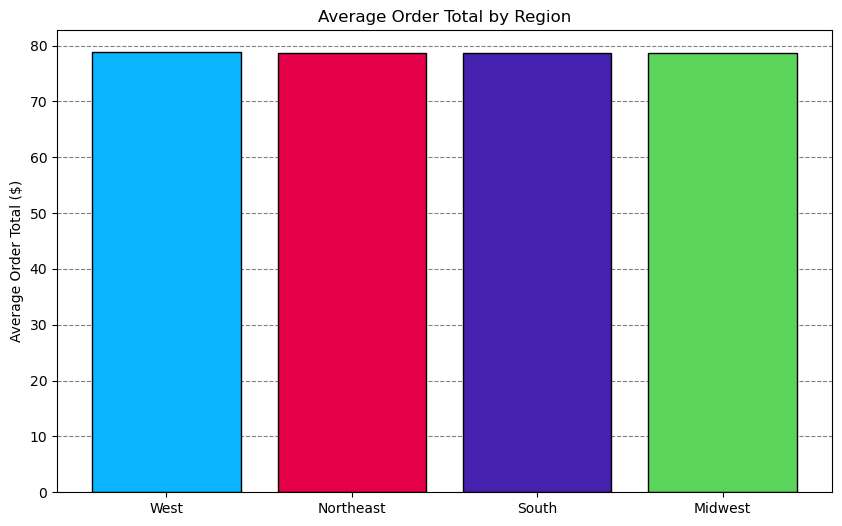

In [179]:
# Set up formatting
# colors = ['#0bb4ff', '#e60049', '#4421af', '#5ad45a', '#ffa300', '#ebdc78'], # colour palette
plt.figure(figsize=(10, 6))

# Plot bars
bars = plt.bar(region_avg_order_total['region'], 
               region_avg_order_total['order_total'], 
               color = ['#0bb4ff', '#e60049', '#4421af', '#5ad45a'],
               edgecolor='black', 
               zorder=2, 
               alpha = 1)
plt.title("Average Order Total by Region")
plt.xlabel("")
plt.xticks(rotation=0)
plt.ylabel("Average Order Total ($)")
plt.grid(axis = 'y', color = 'grey', linestyle = 'dashed')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'instacart_average_order_by_region.png'), bbox_inches = 'tight')

#### 11.6.2 Total Product Orders by Region

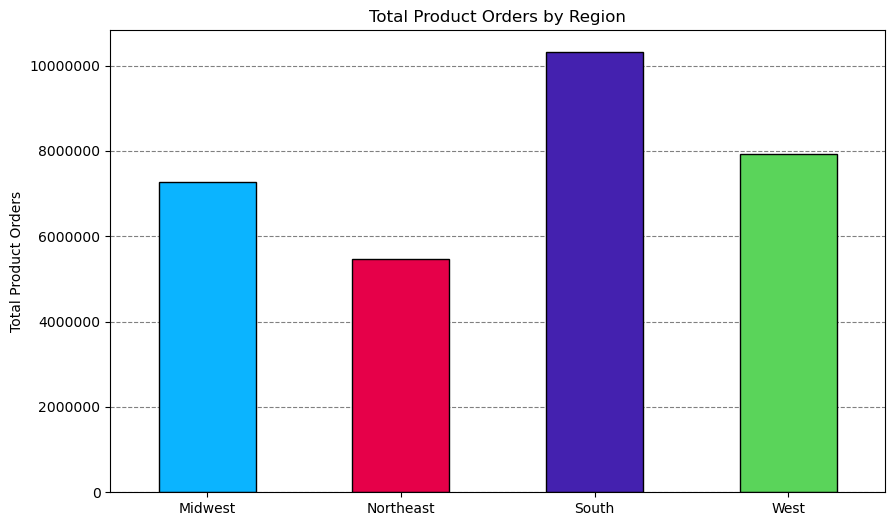

In [181]:
# Set up formatting
# colors = ['#0bb4ff', '#e60049', '#4421af', '#5ad45a', '#ffa300', '#ebdc78'], # colour palette
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style='plain')

# Plot bars
instacart['region'].value_counts().sort_index().plot.bar(color = ['#0bb4ff', '#e60049', '#4421af', '#5ad45a'],
                                                         edgecolor='black', 
                                                         zorder=2, 
                                                         alpha = 1)
plt.title("Total Product Orders by Region")
plt.xlabel("")
plt.xticks(rotation=0)
plt.ylabel("Total Product Orders")
plt.grid(axis = 'y', color = 'grey', linestyle = 'dashed')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','instacart_total_orders_by_region.png'), bbox_inches = 'tight')

### 11.7 Ordering Habits based on Family Status and Age

#### 11.7.1 Average expenditure based on family status and age

In [185]:
order_total_age_marital = customer_profile.groupby(['Marital Status','age_group'])['order_total'].mean().unstack(fill_value=0)
order_total_age_marital

age_group,Middle-Aged Adult,Older Adult,Senior,Young Adult
Marital Status,,,,
divorced/widowed,0.000000,79.622304,78.671823,0.000000
living with parents and siblings,0.000000,0.000000,0.000000,79.416970
married,79.059693,78.654566,78.197606,78.892586
single,78.435622,78.119108,0.000000,78.003530


In [187]:
instacart_dept.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,match,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,customer_frequency,frequency_flag,Gender,State,Age,Date Joined,Number_of_Dependents,Family Status,Income,region,age_group,income_group,dependents_flag,department,_merge
0,2,202279,3,5,9,8.0,False,33120.0,1.0,1.0,Organic Egg Whites,86,16,11.3,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,Older Adult,Middle,Has Dependents,dairy eggs,both
1,2,202279,3,5,9,8.0,False,28985.0,2.0,1.0,Michigan Organic Kale,83,4,13.4,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,Older Adult,Middle,Has Dependents,produce,both
2,2,202279,3,5,9,8.0,False,9327.0,3.0,0.0,Garlic Powder,104,13,3.6,both,Low-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,Older Adult,Middle,Has Dependents,pantry,both
3,2,202279,3,5,9,8.0,False,45918.0,4.0,1.0,Coconut Butter,19,13,8.4,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,Older Adult,Middle,Has Dependents,pantry,both
4,2,202279,3,5,9,8.0,False,30035.0,5.0,0.0,Natural Sweetener,17,13,13.7,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low_spender,24.0,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,Older Adult,Middle,Has Dependents,pantry,both


In [189]:
# Rename 'Family Status' to 'Marital Status'
customer_profile.rename(columns = {'Family Status' : 'Marital Status'}, inplace = True)

In [191]:
order_total_age_marital = customer_profile.groupby(['Marital Status','age_group'])['order_total'].mean().unstack(fill_value=0)
order_total_age_marital

age_group,Middle-Aged Adult,Older Adult,Senior,Young Adult
Marital Status,,,,
divorced/widowed,0.000000,79.622304,78.671823,0.000000
living with parents and siblings,0.000000,0.000000,0.000000,79.416970
married,79.059693,78.654566,78.197606,78.892586
single,78.435622,78.119108,0.000000,78.003530


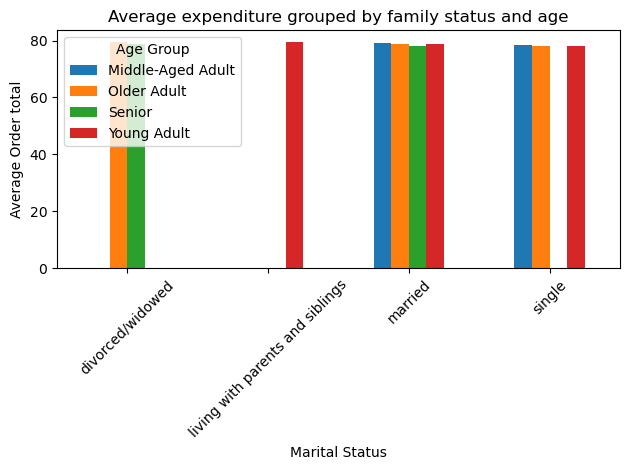

In [193]:
# Plot the grouped bar chart
order_total_age_marital.plot(kind='bar', stacked=False)
plt.title('Average expenditure grouped by family status and age')
plt.xlabel('Marital Status')
plt.ylabel('Average Order total')
plt.xticks(rotation=45)
plt.legend(title='Age Group')
plt.tight_layout()
order_total_age_marital_status = plt.gcf()
order_total_age_marital_status.savefig(os.path.join(path,'04 Analysis','Visualizations',  'order_total_age_marital_status.png'), dpi=300, bbox_inches='tight')

#### 11.7.2 Average Frequency of Order based on family status and age

In [215]:
freq_age_marital = customer_profile.groupby(['Marital Status','age_group'])['days_since_prior_order'].mean().unstack(fill_value=0)
freq_age_marital

age_group,Middle-Aged Adult,Older Adult,Senior,Young Adult
Marital Status,,,,
divorced/widowed,0.000000,10.254361,10.390384,0.000000
living with parents and siblings,0.000000,0.000000,0.000000,10.301481
married,10.400114,10.422344,10.360660,10.357879
single,10.401734,10.296309,0.000000,10.535649


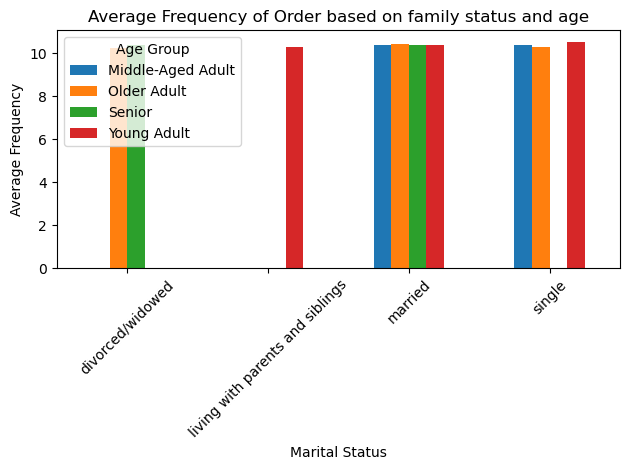

In [217]:
# Plot the grouped bar chart
freq_age_marital.plot(kind='bar', stacked=False)
plt.title('Average Frequency of Order based on family status and age')
plt.xlabel('Marital Status')
plt.ylabel('Average Frequency')
plt.xticks(rotation=45)
plt.legend(title='Age Group')
plt.tight_layout()
freq_age_marital_status = plt.gcf()
freq_age_marital_status.savefig(os.path.join(path, '04 Analysis','Visualizations', 'freq_age_marital_status.png'), dpi=300, bbox_inches='tight')

## 11.8 Ordering Habits for Customer Profiles

#### 11.8.1 Average Order Price by Customer Profile (Income Group)

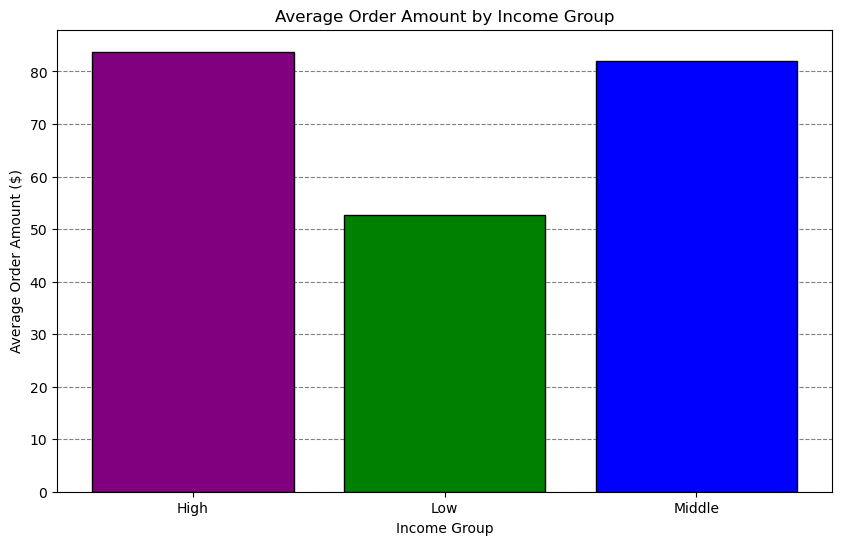

In [219]:
# Make bar chart for average order total
plt.figure(figsize=(10, 6))
plt.bar(income_agg.index, income_agg['order_total', 'mean'], color=['purple', 'green', 'blue'], zorder=2, edgecolor='black')
plt.xlabel('Income Group')
plt.ylabel('Average Order Amount ($)')
plt.title('Average Order Amount by Income Group')
plt.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'instacart_average_order_amount_by_income.png'), bbox_inches = 'tight')

#### 11.8.2 Comparison of Age and Income Group

In [267]:
#Comparing Age Group and Income Group
age_income_compr = pd.crosstab (instacart['age_group'], instacart['income_group'],dropna = False)
age_income_compr

income_group,High,Low,Middle
age_group,,,
Middle-Aged Adult,1932025,1314007,6456507
Older Adult,6735506,811913,2119254
Senior,5413785,637365,1679684
Young Adult,125712,599269,3139537


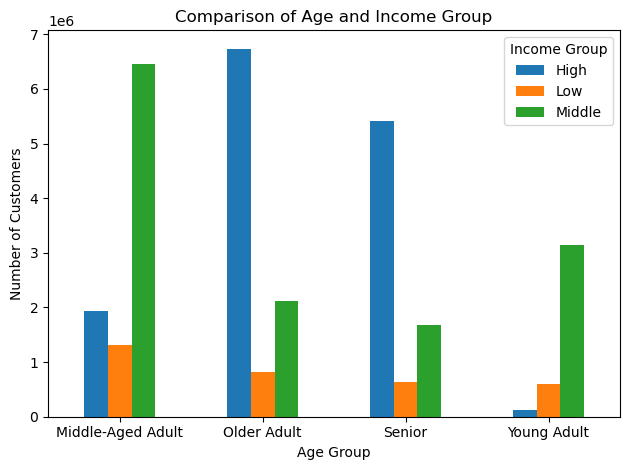

In [269]:
# Plot the  bar chart
age_income_compr.plot(kind='bar', stacked=False)
plt.title('Comparison of Age and Income Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation= 0)
plt.legend(title='Income Group')
plt.tight_layout()
age_income_compr = plt.gcf()
age_income_compr.savefig(os.path.join(path,'04 Analysis','Visualizations', 'age_income_compr.png'), dpi=300, bbox_inches='tight')

#### 11.8.3 Comparing Age Group and Dependents

In [289]:
#Comparing Age Group and Dependents
age_depend_compr = pd.crosstab (instacart['age_group'], instacart['dependents_flag'],dropna = False)
age_depend_compr

dependents_flag,Has Dependents,No Dependents
age_group,,
Middle-Aged Adult,7270139,2432400
Older Adult,7218340,2448333
Senior,5825113,1905721
Young Adult,2911291,953227


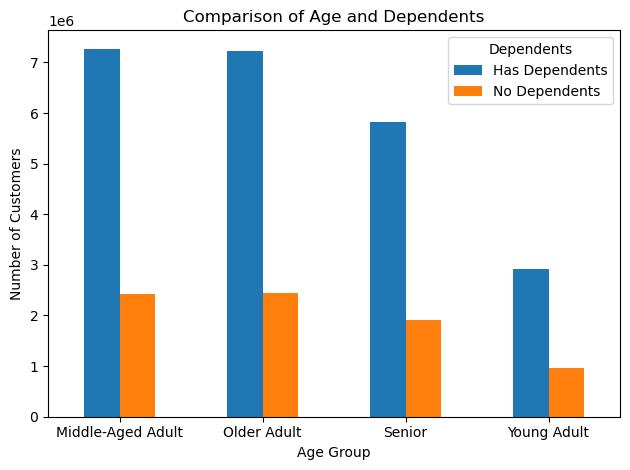

In [291]:
# Plot the  bar chart
age_depend_compr.plot(kind='bar', stacked=False)
plt.title('Comparison of Age and Dependents')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation= 0)
plt.legend(title='Dependents')
plt.tight_layout()
age_depend_compr = plt.gcf()
age_depend_compr.savefig(os.path.join(path,'04 Analysis','Visualizations',  'age_depend_compr.png'), dpi=300, bbox_inches='tight')

#### 11.8.4 Customer Profile Heat Map

In [241]:
customer_profile_new = customer_profile.groupby(['Marital Status','dependents_flag','age_group','income_group']).size().unstack(fill_value=0)
customer_profile_new

income_group                                                          High  \
Marital Status                   dependents_flag age_group                   
divorced/widowed                 No Dependents   Older Adult         45719   
                                                 Senior             120596   
living with parents and siblings Has Dependents  Young Adult          4307   
married                          Has Dependents  Middle-Aged Adult  130589   
                                                 Older Adult        449630   
                                                 Senior             366660   
                                                 Young Adult          3957   
single                           No Dependents   Middle-Aged Adult   43757   
                                                 Older Adult        108765   
                                                 Young Adult          2889   

income_group                                                           Low  \
Marital Status                   dependents_flag age_group                   
divorced/widowed                 No Dependents   Older Adult          7502   
                                                 Senior              19438   
living with parents and siblings Has Dependents  Young Adult         25032   
married                          Has Dependents  Middle-Aged Adult  113232   
                                                 Older Adult         76102   
                                                 Senior              61739   
                                                 Young Adult         26106   
single                           No Dependents   Middle-Aged Adult   38402   
                                                 Older Adult         18350   
                                                 Young Adult         17449   

income_group                                                        Middle  
Marital Status                   dependents_flag age_group                  
divorced/widowed                 No Dependents   Older Adult         15394  
                                                 Senior              38849  
living with parents and siblings Has Dependents  Young Adult        108431  
married                          Has Dependents  Middle-Aged Adult  434414  
                                                 Older Adult        150491  
                                                 Senior             120728  
                                                 Young Adult        103306  
single                           No Dependents   Middle-Aged Adult  146191  
                                                 Older Adult         34274  
                                                 Young Adult         69454

In [243]:
customer_profile_transposed = customer_profile_new.T
customer_profile_transposed

Marital Status  divorced/widowed         living with parents and siblings  \
dependents_flag    No Dependents                           Has Dependents   
age_group            Older Adult  Senior                      Young Adult   
income_group                                                                
High                       45719  120596                             4307   
Low                         7502   19438                            25032   
Middle                     15394   38849                           108431   

Marital Status            married                                  \
dependents_flag    Has Dependents                                   
age_group       Middle-Aged Adult Older Adult  Senior Young Adult   
income_group                                                        
High                       130589      449630  366660        3957   
Low                        113232       76102   61739       26106   
Middle                     434414      150491  120728      103306   

Marital Status             single                          
dependents_flag     No Dependents                          
age_group       Middle-Aged Adult Older Adult Young Adult  
income_group                                               
High                        43757      108765        2889  
Low                         38402       18350       17449  
Middle                     146191       34274       69454

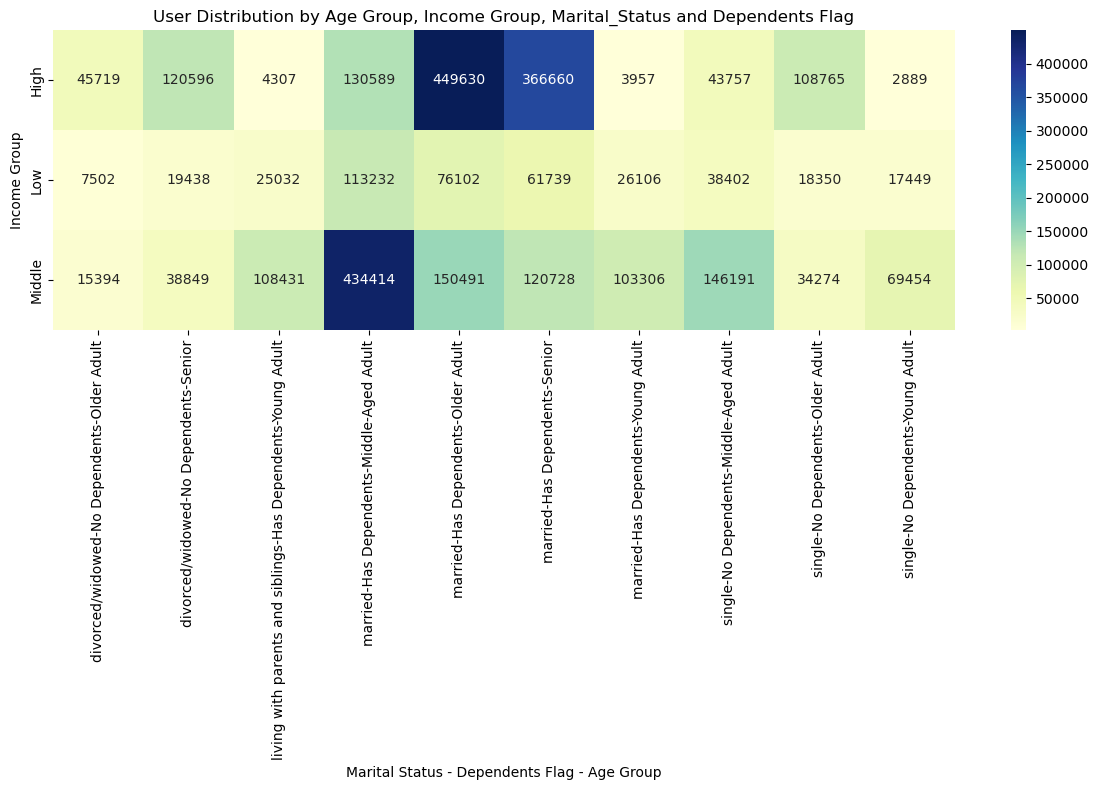

In [245]:
plt.figure(figsize=(12, 8))
# Plot heatmap
sns.heatmap(customer_profile_transposed, annot=True, fmt='d', cmap='YlGnBu')
plt.title('User Distribution by Age Group, Income Group, Marital_Status and Dependents Flag')
plt.ylabel('Income Group')
plt.xlabel('Marital Status - Dependents Flag - Age Group')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'user_distribution_heatmap.png'), bbox_inches='tight')
plt.show()